In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### change code so that using MESHBLOCK ID to initialize random seed

In [3]:
cd ~/gscratch/athena_2/fixed_initialization/

/global/scratch2/sd/dorislee/athena_2/fixed_initialization


In [4]:
import sys
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages/yt-3.2.dev0-py2.7-linux-x86_64.egg')
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages')
sys.path.append('/global/homes/d/dorislee/mypythonpackages')

In [5]:
import h5py
import glob

In [6]:
def compute_fastest_growing_mode(tstep_filename,debug=False):
    if debug: print "Working on {}".format(tstep_filename) 
    hdf5 = h5py.File(tstep_filename, 'r+')
    NUM_MESHBLOCK=24
    D = np.zeros(128)
    for M in np.arange(NUM_MESHBLOCK):
        meshblock =hdf5["MeshBlock{}".format(M)]
        density= meshblock["rho"].value#density for each meshblock
        N_r = density.shape[2]
        N_theta=density.shape[1]
        N_phi= density.shape[0]
        x1f = meshblock["x1f"].value
        x2f = meshblock["x2f"].value
        for n in np.arange(N_phi):
            loc = meshblock.attrs["LogicalLocation"]
            phi_i =n+32*loc[2]
            #Compute D_i in each meshblock
            m=0#mass summed over r,theta per density slice
            for ti in np.arange(N_theta):
                thetai = (x2f[ti]+x2f[ti+1])*0.5
                dthetai = abs(x2f[ti]-x2f[ti+1])
                for rii in np.arange(N_r):
                    #for each cell compute the coordinate to calculate the mass in each cell
                    ri = (x1f[rii]+x1f[rii+1])*0.5
                    dri = abs(x1f[rii]-x1f[rii+1])
                    m=m+density[n,ti,rii]*(ri*ri)*sin(thetai)*dri*dthetai
            D[phi_i]=D[phi_i]+m
    if debug: print "D:",D
    plt.plot(D)
    amp = float(real(max(np.fft.fft(D))))
    if debug: print "amp:", amp
    return D

Working on gid_random_init.out1.00001.ath5
D: [ 0.25777911  0.25777852  0.25778222  0.25778629  0.25779065  0.25779218
  0.25778885  0.25778306  0.2577779   0.25777592  0.2577756   0.25777599
  0.25777798  0.2577823   0.25778799  0.25779246  0.25779428  0.2577922
  0.25778588  0.25777783  0.25777322  0.25777172  0.25777171  0.25777254
  0.25777275  0.25777361  0.25777823  0.25778333  0.25778787  0.25779258
  0.25779482  0.25779438  0.25779317  0.25779246  0.25779235  0.25779183
  0.25778898  0.25778085  0.2577683   0.25775816  0.25775429  0.25775682
  0.25776551  0.25777743  0.25778917  0.25779689  0.25779844  0.25779557
  0.25779001  0.25778384  0.25777871  0.25777396  0.25777216  0.25777347
  0.25777613  0.25777994  0.2577835   0.25778701  0.25778991  0.25779111
  0.25779158  0.25778988  0.25778624  0.25778232  0.25777832  0.25777431
  0.25777104  0.25777137  0.25777604  0.25778149  0.25778659  0.25778992
  0.25778875  0.25778587  0.25778504  0.25778578  0.25778655  0.25778669
  0.25

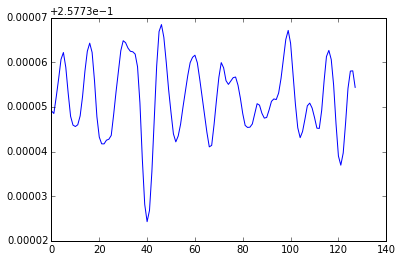

In [8]:
density= compute_fastest_growing_mode("gid_random_init.out1.00001.ath5",True)

Good, verified that there is no artificial periodicity in the initial state (due to looping through meshblocks in one direction)

Working on gid_random_init.out1.00202.ath5
D: [ 0.16598388  0.16462455  0.1634403   0.16242738  0.1615834   0.16089659
  0.16034817  0.15992879  0.15963339  0.15943584  0.15932106  0.15928612
  0.15933004  0.15945247  0.15965372  0.15992983  0.16028024  0.16070853
  0.16121975  0.16181138  0.16247931  0.16323075  0.16407343  0.16499745
  0.1660002   0.16709645  0.16828885  0.16957022  0.17094943  0.17244813
  0.17404819  0.1757508   0.17759563  0.17956925  0.18165708  0.18390631
  0.18632093  0.1888675   0.19159132  0.19452143  0.19761521  0.20089742
  0.20440135  0.20809788  0.21197357  0.21605505  0.22033273  0.22478914
  0.22943548  0.2342548   0.23922994  0.24434657  0.24958738  0.25493673
  0.26038202  0.26590708  0.27149084  0.27711022  0.28274172  0.28836272
  0.29395383  0.29949507  0.30496503  0.3103408   0.31559845  0.32071104
  0.32565576  0.3304223   0.33499479  0.33933081  0.34339017  0.34715149
  0.35059657  0.35370615  0.35647268  0.35886982  0.3608397   0.3623838
  0.36

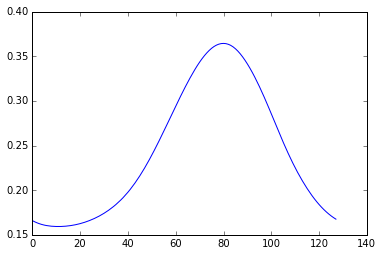

In [9]:
density= compute_fastest_growing_mode("gid_random_init.out1.00202.ath5",True)

In [10]:
from matplotlib.legend_handler import HandlerLine2D

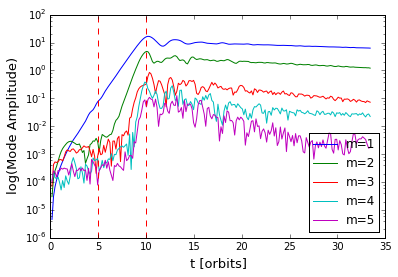

In [16]:
amp =  np.loadtxt("amp.txt")
t_orbits  = np.arange(len(amp))/2./np.pi
plt.ylabel("log(Mode Amplitude)",fontsize=13)
plt.xlabel("t [orbits]",fontsize=13)
# plt.semilogy(t_orbits,amp[:,1])
plt.semilogy(t_orbits,amp[:,1],label="m=1")
plt.semilogy(t_orbits,amp[:,2],label="m=2")
plt.semilogy(t_orbits,amp[:,3],label="m=3")
plt.semilogy(t_orbits,amp[:,4],label="m=4")
plt.semilogy(t_orbits,amp[:,5],label="m=5")
x_min=5
x_max=10
plt.axvline(x_min,color='r',linestyle="--")
plt.axvline(x_max,color='r',linestyle="--")
plt.legend(loc='lower right',prop={'size':12},numpoints=1)

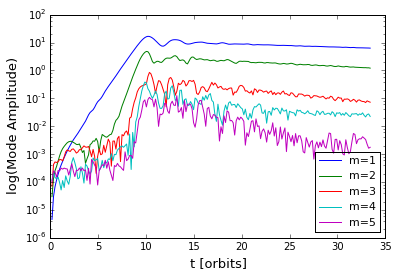

In [55]:
amp =  np.loadtxt("amp.txt")
t_orbits  = np.arange(len(amp))/2./np.pi
plt.ylabel("log(Mode Amplitude)",fontsize=13)
plt.xlabel("t [orbits]",fontsize=13)
# plt.semilogy(t_orbits,amp[:,1])
plt.semilogy(t_orbits,amp[:,1],label="m=1")
plt.semilogy(t_orbits,amp[:,2],label="m=2")
plt.semilogy(t_orbits,amp[:,3],label="m=3")
plt.semilogy(t_orbits,amp[:,4],label="m=4")
plt.semilogy(t_orbits,amp[:,5],label="m=5")
# x_min=5
# x_max=10
# plt.axvline(x_min,color='r',linestyle="--")
# plt.axvline(x_max,color='r',linestyle="--")
# plt.xlim(0,30)
plt.legend(loc='lower right',prop={'size':11},numpoints=1)
plt.savefig("randinit1percent.pdf",format="pdf")

Using the GID, we are able to obtain a m=4 mode that is normally behaving...

In [19]:
def compute_mode_growth(m,x_min,x_max):
    y_min = amp[x_min,:][m]
    y_max = amp[x_max,:][m]
    growth_rate = (y_max-y_min)/(x_max-x_min)
    print "For Mode m=",m
    print "linear growth rate:", growth_rate
    e_folding_time = (x_max-x_min)/log(y_max/y_min)
    print "e-folding time: ",e_folding_time

Computing m=1 mode growth

In [21]:
for i in np.arange(1,6):
    compute_mode_growth(i,5,10)

For Mode m= 1
linear growth rate: 0.654702025278
e-folding time:  8.39043679607
For Mode m= 2
linear growth rate: 0.289152681026
e-folding time:  3.33911574641
For Mode m= 3
linear growth rate: -0.0227006362787
e-folding time:  -4.63202718066
For Mode m= 4
linear growth rate: 0.0478056460289
e-folding time:  2.80909364045
For Mode m= 5
linear growth rate: 0.00023842366448
e-folding time:  193.434905042


### Driving with $amp\cdot sin(\phi)$ where m=1

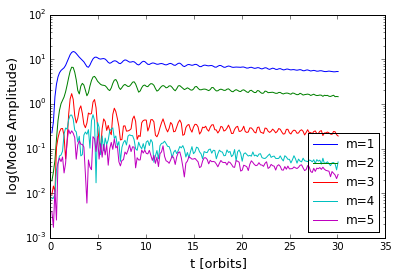

In [37]:
amp =  np.loadtxt("../../athena/m1modedrive/amp.txt")
t_orbits  = np.arange(len(amp))/2./np.pi
plt.ylabel("log(Mode Amplitude)",fontsize=13)
plt.xlabel("t [orbits]",fontsize=13)
# plt.semilogy(t_orbits,amp[:,1])
plt.semilogy(t_orbits,amp[:,1],label="m=1")
plt.semilogy(t_orbits,amp[:,2],label="m=2")
plt.semilogy(t_orbits,amp[:,3],label="m=3")
plt.semilogy(t_orbits,amp[:,4],label="m=4")
plt.semilogy(t_orbits,amp[:,5],label="m=5")
x_min = 0
x_max=0
# plt.xlim(x_min,x_max)
plt.axvline(x_min,color='r',linestyle="--")
plt.axvline(x_max,color='r',linestyle="--")
plt.legend(loc='lower right',prop={'size':12},numpoints=1)

In [87]:
for i in np.arange(1,6):
    compute_mode_growth(i,6,13)

For Mode m= 1
linear growth rate: 16123147.2906
e-folding time:  0.421794316803
For Mode m= 2
linear growth rate: 5530620.90651
e-folding time:  0.45086212625
For Mode m= 3
linear growth rate: 5450614.30964
e-folding time:  0.451285680996
For Mode m= 4
linear growth rate: 17988459.9274
e-folding time:  0.419030171552
For Mode m= 5
linear growth rate: 26291699.769
e-folding time:  0.409721788477


I suspect that the 1% amplitude perturbation was too strong and entered in the nonlinear phase too early, Hawley said use <1% and the key was to pick the amp so that you have enough time in the linear regime

### Running with m=1 perturbation 0.5%

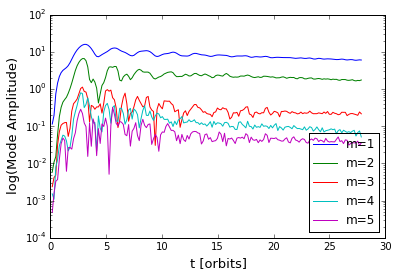

In [46]:
amp =  np.loadtxt("../../athena/m1modedrive/amp_0_05.txt")
t_orbits  = np.arange(len(amp))/2./np.pi
plt.ylabel("log(Mode Amplitude)",fontsize=13)
plt.xlabel("t [orbits]",fontsize=13)
# plt.semilogy(t_orbits,amp[:,1])
plt.semilogy(t_orbits,amp[:,1],label="m=1")
plt.semilogy(t_orbits,amp[:,2],label="m=2")
plt.semilogy(t_orbits,amp[:,3],label="m=3")
plt.semilogy(t_orbits,amp[:,4],label="m=4")
plt.semilogy(t_orbits,amp[:,5],label="m=5")
x_min = 0
x_max=0
# plt.xlim(x_min,x_max)
plt.xlim(x_min,30)
plt.axvline(x_min,color='r',linestyle="--")
plt.axvline(x_max,color='r',linestyle="--")
plt.legend(loc='lower right',prop={'size':12},numpoints=1)

You could see the m=1 clearly in the first 10 steps with d=0.8 or so, clearly this was too storng, non linear phase starts at t=11. I should've stoped this simulation much earlier than this...

for 0.05%, begin nonlinear at t = 24

for 0.01%,  begin nonlinear at t=35 

for 0.001% , begin nonlinear at t=41

Submitted a job that is 0.001%

For the 0.001% one: 

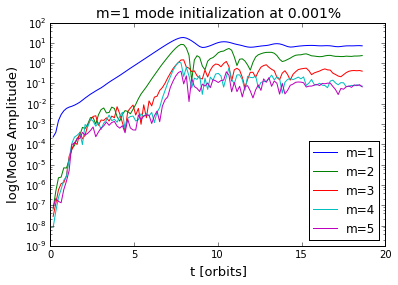

In [50]:
amp =  np.loadtxt("../../athena/m1modedrive/amp.txt")
t_orbits  = np.arange(len(amp))/2./np.pi
plt.ylabel("log(Mode Amplitude)",fontsize=13)
plt.xlabel("t [orbits]",fontsize=13)
# plt.semilogy(t_orbits,amp[:,1])
plt.semilogy(t_orbits,amp[:,1],label="m=1")
plt.semilogy(t_orbits,amp[:,2],label="m=2")
plt.semilogy(t_orbits,amp[:,3],label="m=3")
plt.semilogy(t_orbits,amp[:,4],label="m=4")
plt.semilogy(t_orbits,amp[:,5],label="m=5")
x_min = 0
x_max=0
# plt.xlim(x_min,x_max)
# plt.xlim(x_min,30)
plt.axvline(x_min,color='r',linestyle="--")
plt.axvline(x_max,color='r',linestyle="--")
plt.title("m=1 mode initialization at 0.001%",fontsize=14)
plt.legend(loc='lower right',prop={'size':12},numpoints=1)
plt.savefig("m1init1E-5.pdf",format="pdf")